In [1]:
from urllib.parse import urlparse, urljoin, ParseResult
from crawler import PageFetcher, Scheduler
from collections import OrderedDict
from crawler.domain import Domain
import seaborn as sns
from matplotlib import pyplot as plt
import time
import numpy as np
from tqdm import tqdm
import pandas as pd

In [2]:
seeds = ["http://www.terra.com.br/", "https://www.uol.com.br/", "https://www.bbc.com/"]

In [3]:
studies = list()
results = list()

In [4]:
n_threads = list(np.arange(1, 20, step=5)) + list(np.arange(30, 100, step=20))
for n in n_threads:
    studies.append({"n_threads": n})

In [5]:
for study in tqdm(studies):
    start_time = time.time()
    print(f"start_time = {start_time}")
    scheduler = Scheduler("batata-bot", page_limit=100, depth_limit=6, arr_urls_seeds=[urlparse(seed) for seed in seeds])
    n_threads = study["n_threads"]
    threads = list()
    for t in range(n_threads):
        pf = PageFetcher(scheduler)
        pf.start()
        threads.append(pf)
    for thread in threads:
        thread.join()
    new_time = time.time()
    print(f"new_time = {new_time}")
    total_time = new_time - start_time
    print(f"total_time = {total_time}")
    print(f"{total_time} segundos = {total_time / 60} minutos")
    results.append({"n_threads": n_threads, "time": total_time})

  0%|                                                     | 0/8 [00:00<?, ?it/s]

start_time = 1652268269.2826777
A url 'https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:0;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte


 12%|█████▋                                       | 1/8 [00:58<06:49, 58.47s/it]

new_time = 1652268327.7565205
total_time = 58.47384285926819
58.47384285926819 segundos = 0.9745640476544698 minutos
start_time = 1652268327.7585766
A url 'https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:0;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte
A url 'https://pagbank.onelink.me/7YaT?pid=midia-interna&c=20210903_uol_selo_home_cabeca&af_web_dp=https%3A%2F%2Fpagseguro.uol.com.br%2Fconta-digital%2Frendimento&af_dp=psmyaccount%3A%2F%2Fhome' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte
A url 'https://chatvendas.uol.com.br/ChatWEB/AbrirTelaCriarChat.do?site=5' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can'

 25%|███████████▎                                 | 2/8 [01:14<03:20, 33.48s/it]

new_time = 1652268343.7336478
total_time = 15.97507119178772
15.97507119178772 segundos = 0.26625118652979535 minutos
start_time = 1652268343.7347958
A url 'https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:0;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte
A url 'https://downloads.bbc.co.uk/aboutthebbc/reports/reports/modern-slavery-statement-2021.pdf' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
A url 'https://pagbank.onelink.me/7YaT?pid=midia-interna&c=20210903_uol_selo_home_cabeca&af_web_dp=https%3A%2F%2Fpagseguro.uol.com.br%2Fconta-digital%2Frendimento&af_dp=psmyaccount%3A%2F%2Fhome' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeD

 38%|████████████████▉                            | 3/8 [01:28<02:02, 24.43s/it]

new_time = 1652268357.4001877
total_time = 13.66539192199707
13.66539192199707 segundos = 0.2277565320332845 minutos
start_time = 1652268357.4017775
A url 'https://downloads.bbc.co.uk/aboutthebbc/reports/reports/modern-slavery-statement-2021.pdf' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
A url 'https://clicklogger.rm.uol.com.br/?prd=32&grp=src:210;chn:0;creative:barrauol;thm:barrauol-pagseguro&msr=Cliques%20de%20Origem:1&oper=11&redir=https://pagseguro.uol.com.br/' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte
A url 'https://pagbank.onelink.me/7YaT?pid=midia-interna&c=20210903_uol_selo_home_cabeca&af_web_dp=https%3A%2F%2Fpagseguro.uol.com.br%2Fconta-digital%2Frendimento&af_dp=psmyaccount%3A%2F%2Fhome' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDe

 50%|██████████████████████▌                      | 4/8 [01:42<01:22, 20.56s/it]

new_time = 1652268372.0376604
total_time = 14.63588285446167
14.63588285446167 segundos = 0.2439313809076945 minutos
start_time = 1652268372.0392492
A url 'javascript:;' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: javascript>
A url 'whatsapp://send?text=%2AAo+vivo+atriz+admite+para+o+atual+marido+que+ainda+sente+falta+do+ex%2A%3A+https%3A%2F%2Fepipoca.com.br%2Fatriz-admite-para-o-atual-marido-que-ainda-sente-falta-do-ex%2F%3Futm_source%3Dwhatsapp%26utm_medium%3Dshare-engagement' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: whatsapp>
A url 'https://assinecarta.com.br/?Site_txt=site_carta&Origem_txt=materias&Formato_txt=Senado aprova aumento de gastos do governo com propaganda em ano eleitoral&Banner_txt=&Versao_txt=&utm_source=site_carta&utm_medium=materias&utm_campaign=Senado aprova aumento de gastos do governo com propaganda em ano eleitoral&ut

/home/aluno/miniconda3/envs/ri/lib/python3.7/site-packages/bs4/builder/__init__.py:546: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  XMLParsedAsHTMLWarning.MESSAGE, XMLParsedAsHTMLWarning


A url 'https://www.google.com.br/webhp?tab=8w' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xed in position 7261: invalid continuation byte
A url 'mailto:atendimento@cartacapital.com.br' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: mailto>
A url 'tg://resolve?domain=cartacapitaloficial' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: tg>
A url 'tg://msg_url?url=https%3A%2F%2Fepipoca.com.br%2Fatriz-admite-para-o-atual-marido-que-ainda-sente-falta-do-ex%2F%3Futm_source%3Dtelegram%26utm_medium%3Dshare-engagement&text=Ao%20vivo%20atriz%20admite%20para%20o%20atual%20marido%20que%20ainda%20sente%20falta%20do%20ex' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: tg>
A url 'https://clicklogger.rm.uol.com.br/?prd=32&grp=src:

 62%|████████████████████████████▏                | 5/8 [02:21<01:21, 27.29s/it]

A url 'https://app.adjust.net.in/dyvodl2?redirect=https%3A%2F%2Fapps.apple.com%2Fapp%2Fapple-store%2Fid1056182234' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error [Errno -3] Temporary failure in name resolution>
new_time = 1652268411.2613864
total_time = 39.222137212753296
39.222137212753296 segundos = 0.6537022868792216 minutos
start_time = 1652268411.2629027
A url 'whatsapp://send?text=%2AAo+vivo+atriz+admite+para+o+atual+marido+que+ainda+sente+falta+do+ex%2A%3A+https%3A%2F%2Fepipoca.com.br%2Fatriz-admite-para-o-atual-marido-que-ainda-sente-falta-do-ex%2F%3Futm_source%3Dwhatsapp%26utm_medium%3Dshare-engagement' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: whatsapp>
A url 'https://assinecarta.com.br/?Site_txt=site_carta&Origem_txt=materias&Formato_txt=Senado aprova aumento de gastos do governo com propaganda em ano eleitoral&Banner_txt=&Versao_txt=&utm_source=site_c

 75%|█████████████████████████████████▊           | 6/8 [02:39<00:48, 24.00s/it]

new_time = 1652268428.8753176
total_time = 17.612414836883545
17.612414836883545 segundos = 0.29354024728139244 minutos
start_time = 1652268428.8768737
A url 'https://downloads.bbc.co.uk/aboutthebbc/reports/reports/modern-slavery-statement-2021.pdf' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
A url 'http://downloads.bbc.co.uk/aboutthebbc/reports/pdf/bbcmsa2020.pdf' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
A url 'https://www.uolhost.uol.com.br/uol-cloud-computing.html?utm_medium=uol.com.br&utm_source=interna&utm_campaign=rodapé_uol&utm_content=link_fixo&utm_term=cloud_computing' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeEncodeError'>: 'ascii' codec can't encode character '\xe9' in position 89: ordinal not in range(128)
A url 'https://u

 88%|███████████████████████████████████████▍     | 7/8 [03:02<00:23, 23.50s/it]

new_time = 1652268451.339545
total_time = 22.462671279907227
22.462671279907227 segundos = 0.37437785466512047 minutos
start_time = 1652268451.3408184
A url 'https://downloads.bbc.co.uk/aboutthebbc/reports/reports/modern-slavery-statement-2021.pdf' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
A url 'http://downloads.bbc.co.uk/aboutthebbc/reports/pdf/bbcmsa2020.pdf' não foi coletada, a seguinte exceção foi lançada:
<class 'UnicodeDecodeError'>: 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte
A url 'javascript:;' não foi coletada, a seguinte exceção foi lançada:
<class 'urllib.error.URLError'>: <urlopen error unknown url type: javascript>
A url 'whatsapp://send?text=%2AAo+vivo+atriz+admite+para+o+atual+marido+que+ainda+sente+falta+do+ex%2A%3A+https%3A%2F%2Fepipoca.com.br%2Fatriz-admite-para-o-atual-marido-que-ainda-sente-falta-do-ex%2F%3Futm_sou

100%|█████████████████████████████████████████████| 8/8 [03:25<00:00, 25.74s/it]

new_time = 1652268475.1808474
total_time = 23.840029001235962
23.840029001235962 segundos = 0.39733381668726603 minutos


In [6]:
df = pd.DataFrame.from_dict(results)
df

,n_threads,time
0,1,58.473843
1,6,15.975071
2,11,13.665392
3,16,14.635883
4,30,39.222137
5,50,17.612415
6,70,22.462671
7,90,23.840029


In [8]:
df.to_csv("results.csv")

<AxesSubplot:xlabel='n_threads'>

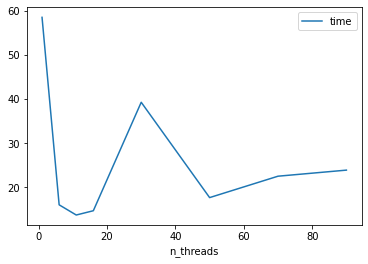

In [10]:
df.plot(x="n_threads", y="time")